In [12]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sentence_transformers import SentenceTransformer, util
from scipy.spatial import cKDTree
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
import pickle
import re
from utils.normalizor import normalizor
import tqdm
import math

In [13]:
model = SentenceTransformer('all-roberta-large-v1')
# model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
# model.load_state_dict(torch.load('model1.pt'))

In [14]:
correct = 0
dif = 0
mp = {}
ma = 0

plotx = []
ploty = []

In [15]:
tree : cKDTree
Comments = []

with open("data/data.pkl", "rb") as f:
    raw = pickle.load(f)
    tree = pickle.loads(raw)

with open("data/comments.pkl", "rb") as f:
    Comments = pickle.load(f)

In [16]:
for num, (position, comment) in enumerate(Comments):
    # position = position[39:]
    # position = re.sub(u"([^\u4e00-\u9fa5\u0030-\u0039\u0041-\u005a\u0061-\u007a])","",position)
    # q = tree.query(normalizor(model.encode(position, convert_to_tensor = False)), 5)[1]
    q = tree.query(normalizor(model.encode(comment, convert_to_tensor=False)), 5)[1]
    miny = 100000
    for y in q:
        miny = min(miny, abs(y - num))
        if abs(y - num) < len(Comments) / 100:
            correct += 1
            break
    plotx.append(num)
    ploty.append(miny)
    if num % 100 == 1:
        print("[{}/{}]({:.2f}%) correct:{}(rate:{:.2f}%)".format(num, len(Comments), num/len(Comments)*100, correct, correct / (num + 1) * 100))

print('{:.2f}%'.format(correct / len(Comments) * 100))

[1/8582](0.01%) correct:2(rate:100.00%)
[101/8582](1.18%) correct:95(rate:93.14%)
[201/8582](2.34%) correct:169(rate:83.66%)
[301/8582](3.51%) correct:249(rate:82.45%)
[401/8582](4.67%) correct:344(rate:85.57%)
[501/8582](5.84%) correct:421(rate:83.86%)
[601/8582](7.00%) correct:503(rate:83.55%)
[701/8582](8.17%) correct:582(rate:82.91%)
[801/8582](9.33%) correct:655(rate:81.67%)
[901/8582](10.50%) correct:737(rate:81.71%)
[1001/8582](11.66%) correct:800(rate:79.84%)
[1101/8582](12.83%) correct:880(rate:79.85%)
[1201/8582](13.99%) correct:941(rate:78.29%)
[1301/8582](15.16%) correct:1000(rate:76.80%)
[1401/8582](16.32%) correct:1073(rate:76.53%)
[1501/8582](17.49%) correct:1142(rate:76.03%)
[1601/8582](18.66%) correct:1210(rate:75.53%)
[1701/8582](19.82%) correct:1269(rate:74.56%)
[1801/8582](20.99%) correct:1360(rate:75.47%)
[1901/8582](22.15%) correct:1433(rate:75.34%)
[2001/8582](23.32%) correct:1512(rate:75.52%)
[2101/8582](24.48%) correct:1571(rate:74.74%)
[2201/8582](25.65%) corr

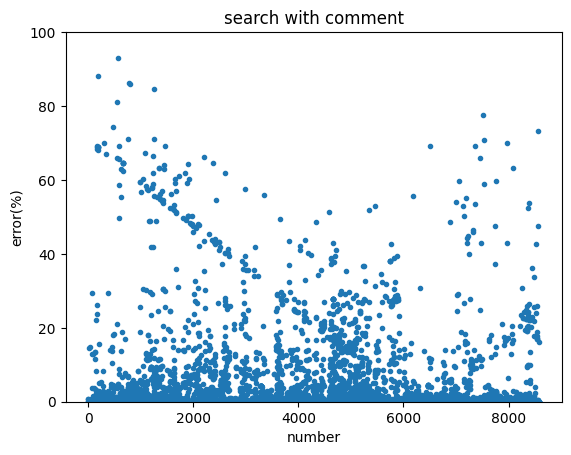

In [17]:
y = [y / len(Comments) * 100 for y in ploty]
plt.plot(plotx, y, '.')
plt.ylim(0, 100)
plt.xlabel("number")
plt.ylabel("error(%)")
plt.title("search with comment")
plt.show()